In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 100, 3
factors = [np.random.randn(N, R) for _ in range(3)]

# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise

In [3]:
als_results = tt.fit_ensemble(data, range(1,9), replicates=10, method='direct', options={'tol': 1e-6})
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.7732, max error = 0.8647, mean error = 0.7936, time to fit = 1.1128s
Optimizing rank-2 models.
   10/10 converged, min error = 0.5052, max error = 0.6366, mean error = 0.5595, time to fit = 1.5052s
Optimizing rank-3 models.
   10/10 converged, min error = 0.0546, max error = 0.5051, mean error = 0.0997, time to fit = 1.6319s
Optimizing rank-4 models.
   10/10 converged, min error = 0.0546, max error = 0.0546, mean error = 0.0546, time to fit = 1.6794s
Optimizing rank-5 models.
   10/10 converged, min error = 0.0546, max error = 0.0546, mean error = 0.0546, time to fit = 3.4973s
Optimizing rank-6 models.
   10/10 converged, min error = 0.0546, max error = 0.0546, mean error = 0.0546, time to fit = 5.8513s
Optimizing rank-7 models.
   10/10 converged, min error = 0.0546, max error = 0.0546, mean error = 0.0546, time to fit = 1.7472s
Optimizing rank-8 models.
   10/10 converged, min error = 0.0546, max error = 0.0546, mean error 

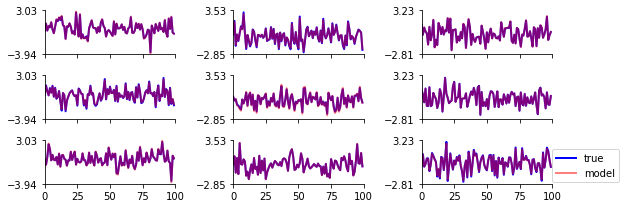

In [4]:
fig, axes, plot_obj = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);
axes[-1,-1].legend(('true', 'model'), bbox_to_anchor=[0,0,1.55,0.9])

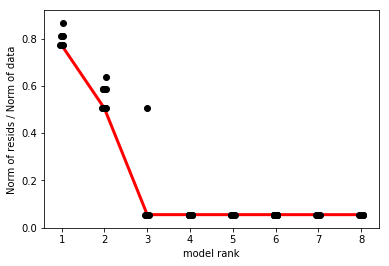

In [5]:
ax = tt.plot_error(als_results, scatter_kw=dict(c='k'), line_kw=dict(c='r', lw=3, zorder=0));